Kaggle  <br>
New notebook <br>
In alto a destra "Add data", cerca dataset del progetto <br>

# Maneggiare json

In [162]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os , json


In [163]:
path_to_json = '../input/CORD-19-research-challenge/document_parses/pdf_json/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files[0])  

8187ea360c53a56ca2c579d758a5d6aa67716836.json


In [164]:
path = path_to_json + json_files[3] 
f = open(path)
data = json.load(f)
data['metadata']['authors'][0]['first']

'Riccardo'

In [165]:
# Ottenere il testo del body text

N_section = len(data['body_text'])
text = str('')

for i in range(N_section):
    text = text + data['body_text'][i]['text']
    
#text

# Dask bag

In [166]:
from dask import delayed
import dask.bag as db
import time
from dask.distributed import Client

# dask-worker dask-scheduler:8787
#scheduler:8787

# Leave blank to setup a local cluster. Put the scheduler IP to distributed cluster.

client = Client()
client.cluster

/opt/conda/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35081 instead
  http_address["port"], self.http_server.port


In [167]:
# bag of single file

b = db.read_text(path_to_json + json_files[3],linedelimiter='aabbccddff').map(json.loads)

In [168]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, WordPunctTokenizer

stop_words = set(stopwords.words('english'))

def isvalidword(x, stop_words = set(stopwords.words('english'))):
    return not x.lower() in stop_words

def isalpha(x):
    return x.isalpha()

In [169]:
j = b.pluck('body_text').flatten().pluck('text')

j = db.from_sequence(['Talk aut aut joy, paper, scissor,water! trash.cozy jk 0 !;'])

k = j.map(WordPunctTokenizer().tokenize).flatten()

l = k.filter(isvalidword)

m = l.filter(isalpha)

o = m.frequencies()
o.take(55)

(('Talk', 1),
 ('aut', 2),
 ('joy', 1),
 ('paper', 1),
 ('scissor', 1),
 ('water', 1),
 ('trash', 1),
 ('cozy', 1),
 ('jk', 1))

# Caricare piu' json in una sola bag

In [132]:
# lista di indirizzi relativi ai file
l = []
for j in range(1000):
    l += [path_to_json + json_files[j]]

# l = list(( path_to_json + json_files[0] , path_to_json + json_files[1], path_to_json + json_files[2], path_to_json + json_files[3] ))

b = db.read_text(l,linedelimiter='aabbccddff').map(json.loads)
b

dask.bag<loads, npartitions=1000>

In [134]:
data1 = b.take(1,npartitions=3)[0]
data1['body_text'][0]['text']

'Research Letter to the Editor:'

In [145]:
j = b.pluck('body_text').flatten().pluck('text')
print(j.take(5))
#j = db.from_sequence(['Talk aut aut joy, paper, scissor,water! trashIzma jk 0 !;'])

k = j.map(WordPunctTokenizer().tokenize).flatten()
print(k.take(5))
l = k.filter(isvalidword)
print(l.take(5))
m = l.filter(isalpha)
print(m.take(15))
o = m.frequencies(sort=True)
o.take(15)

('Research Letter to the Editor:', 'We are writing to call attention to the profound psychological/ physiological stress caused by the ongoing coronavirus disease 2019 (COVID-19) pandemic. As second waves are on the rise, U.S. total death rates related to COVID-19 are greater than 270,000, and above 1.5 million worldwide [1] . While public health guidelines continue to advise social distancing to prevent further spread of the virus, this very distancing increases pandemic-induced isolation, fear of infection, and fear of death [2] [3] [4] [5] [6] [7] [8] . Extended periods of social isolation have led to disruption of daily routines, separation from loved ones, and perceived loss of autonomy. The subsequent distress has been labeled a "parallel epidemic," [8] and an unprecedented "shock to humanity\'s fabric," [7] rife with anxiety, depression, post-traumatic stress symptoms, and suicidal ideations [2] [3] [4] [5] [6] [7] [8] .', 'Although medical literature has focused on COVID-19-pos

(('patients', 12407),
 ('et', 10157),
 ('COVID', 10156),
 ('al', 9843),
 ('study', 8237),
 ('also', 7837),
 ('cells', 7001),
 ('data', 6628),
 ('may', 6198),
 ('used', 6048),
 ('infection', 5822),
 ('time', 5723),
 ('using', 5383),
 ('SARS', 5152),
 ('virus', 5098))

In [151]:
p = o.take(6)
print(p)

(('patients', 12407), ('et', 10157), ('COVID', 10156), ('al', 9843), ('study', 8237), ('also', 7837))


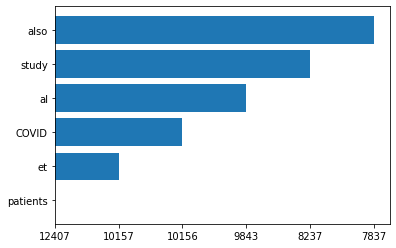

In [161]:
import matplotlib.pyplot as plt
plt.barh(np.arange(len(p)),np.array(p)[:,1], tick_label=np.array(p)[:,0])
plt.show()

In [ ]:
data = b.take(3,npartitions=3)

# prova di filtraggio
s = b.filter(lambda record: record['paper_id'] == '8187ea360c53a56ca2c579d758a5d6aa67716836')
s.take(1000) 